#### PGGM Data Science Bootcamp 2020
*Notebook by [Pedro V Hernandez Serrano](https://github.com/pedrohserrano)*

---
![](../img/image_3.png)

# 3. Data Wrangling with Pandas
* [3.1. Pandas Functions](#3.1)
* [3.2. Data Transformations](#3.2)

---

**[Pandas](http://pandas.pydata.org)** is a Python library that provides extensive means for data analysis. Data scientists often work with data stored in table formats like `.csv`, `.tsv`, or `.xlsx`. Pandas makes it very convenient to load, process, and analyze such tabular data using SQL-like queries. In conjunction with `Matplotlib` and `Seaborn`, `Pandas` provides a wide range of opportunities for visual analysis of tabular data. 

The main data structures in `Pandas` are implemented with **Series** and **DataFrame** classes. The former is a one-dimensional indexed array of some fixed data type. The latter is a two-dimensional data structure - a table - where each column contains data of the same type. You can see it as a dictionary of `Series` instances. `DataFrames` are great for representing real data: rows correspond to instances (examples, observations, etc.), and columns correspond to features of these instances.

---
### 3.1. Pandas Functions
<a id="3.1">

In [1]:
import pandas as pd

We’ll demonstrate the main methods in action by analyzing a sample dataset provided by PGGM. Let’s read the data (using `read_csv`), and take a look at the first 5 lines using the `head` method:

In [2]:
data = pd.read_csv('../datasets/pggm_dataset.csv')

In [3]:
#dir(data) dataframe functions

In [4]:
data.head(1)

,Identifier,Name,Period,Period_YYYYMMDD,Ticker,Universe_Returns_F1W,Universe_Returns_F4W,Universe_Returns_F12W,Weight,GICS_Sector,GICS_Ind_Grp,Market_Cap_USD,Price_USD,NTM_EP,LTM_ROA,BP,LTM_EP,5Y_Sales_Growth
0,17290810,Cintas Corporation,12/31/2014,20141231,CTAS-US,-2.517855,-0.121111,4.156041,0.000402,Industrials,Commercial & Professional Services,7761.12,78.44,0.044387,9.089989,0.246962,0.042708,4.718765


**Shape of the data**

In [5]:
data.shape

(38304, 18)

In [6]:
data.describe()

,Period_YYYYMMDD,Universe_Returns_F1W,Universe_Returns_F4W,Universe_Returns_F12W,Weight,Market_Cap_USD,Price_USD,NTM_EP,LTM_ROA,BP,LTM_EP,5Y_Sales_Growth
count,3.830400e+04,38300.000000,38296.000000,38268.000000,38304.000000,3.830400e+04,38304.000000,38246.000000,38245.000000,38288.000000,38215.000000,38197.000000
mean,2.017809e+07,0.037778,-0.025070,-0.534635,0.001593,3.828089e+04,111.173980,0.060218,5.842138,0.365269,0.039273,16.717226
std,7.340507e+03,3.982946,7.509304,11.969478,0.003048,7.374643e+04,178.296736,0.031881,7.245260,0.308932,0.056394,312.939623
min,2.014123e+07,-47.561474,-67.705421,-68.235580,0.000069,1.432547e+03,3.410000,-0.346678,-80.447959,-0.896646,-1.689621,-100.000000
25%,2.018021e+07,-1.843239,-4.256311,-7.583998,0.000403,9.659986e+03,45.170000,0.042177,1.739803,0.151267,0.020475,0.497268
50%,2.018053e+07,0.277680,0.329203,-0.362670,0.000652,1.568286e+04,73.820000,0.057110,4.923546,0.292937,0.040028,5.253313
75%,2.018091e+07,2.159980,4.400995,6.686374,0.001454,3.509461e+04,123.830000,0.076561,9.015668,0.504965,0.059893,11.886979
max,2.018123e+07,46.864033,63.502525,114.599991,0.044994,1.140656e+06,3646.690000,0.345388,64.735065,3.589774,0.383827,14039.748000


In [7]:
data.columns

Index(['Identifier', 'Name', 'Period', 'Period_YYYYMMDD', 'Ticker',
       'Universe_Returns_F1W', 'Universe_Returns_F4W', 'Universe_Returns_F12W',
       'Weight', 'GICS_Sector', 'GICS_Ind_Grp', 'Market_Cap_USD', 'Price_USD',
       'NTM_EP', 'LTM_ROA', 'BP', 'LTM_EP', '5Y_Sales_Growth'],
      dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38304 entries, 0 to 38303
Data columns (total 18 columns):
Identifier               38304 non-null object
Name                     38304 non-null object
Period                   38304 non-null object
Period_YYYYMMDD          38304 non-null int64
Ticker                   38304 non-null object
Universe_Returns_F1W     38300 non-null float64
Universe_Returns_F4W     38296 non-null float64
Universe_Returns_F12W    38268 non-null float64
Weight                   38304 non-null float64
GICS_Sector              38304 non-null object
GICS_Ind_Grp             38304 non-null object
Market_Cap_USD           38304 non-null float64
Price_USD                38304 non-null float64
NTM_EP                   38246 non-null float64
LTM_ROA                  38245 non-null float64
BP                       38288 non-null float64
LTM_EP                   38215 non-null float64
5Y_Sales_Growth          38197 non-null float64
dtypes: float64(11), int64(1), obje

In order to see statistics on non-numerical features, one has to explicitly indicate data types of interest in the `include` parameter.

In [9]:
data.describe(include=['object'])

,Identifier,Name,Period,Ticker,GICS_Sector,GICS_Ind_Grp
count,38304,38304,38304,38304,38304,38304
unique,781,814,61,781,11,25
top,43707610,"Travelers Companies, Inc.",9/30/2015,FNF-US,Information Technology,Software & Services
freq,61,61,637,61,6117,3507


For categorical (type `object`) and boolean (type `bool`) features we can use the `value_counts` method. Let’s have a look at the distribution of `Sector`:

To calculate fractions, pass `normalize=True` to the `value_counts` function.

In [10]:
data['GICS_Sector'].value_counts(normalize=True)

Information Technology    0.159696
Consumer Discretionary    0.157764
Financials                0.144737
Industrials               0.137009
Health Care               0.109649
Energy                    0.061534
Real Estate               0.059106
Consumer Staples          0.057357
Utilities                 0.051117
Materials                 0.048846
Communication Services    0.013184
Name: GICS_Sector, dtype: float64

### Sorting

A DataFrame can be sorted by the value of one of the variables (i.e columns). For example, we can sort by values of a variable (use ascending=False to sort in descending order):

In [11]:
data.sort_values(by='Price_USD', ascending=False)

,Identifier,Name,Period,Period_YYYYMMDD,Ticker,Universe_Returns_F1W,Universe_Returns_F4W,Universe_Returns_F12W,Weight,GICS_Sector,GICS_Ind_Grp,Market_Cap_USD,Price_USD,NTM_EP,LTM_ROA,BP,LTM_EP,5Y_Sales_Growth
7049,62944T10,"NVR, Inc.",1/17/2018,20180117,NVR-US,-1.631343,-16.088015,-15.265626,0.000517,Consumer Discretionary,Consumer Durables & Apparel,12969.2300,3646.69,0.051379,19.738139,0.127477,0.038805,15.803665
7681,62944T10,"NVR, Inc.",1/24/2018,20180124,NVR-US,-11.402488,-11.211806,-15.226358,0.000502,Consumer Discretionary,Consumer Durables & Apparel,12757.6580,3587.20,0.053347,19.738139,0.127477,0.038805,15.803665
5785,62944T10,"NVR, Inc.",1-3-2018,20180103,NVR-US,-1.318616,-10.796475,-16.417854,0.000522,Consumer Discretionary,Consumer Durables & Apparel,12670.9870,3562.83,0.048533,19.738139,0.127477,0.038805,15.803665
6417,62944T10,"NVR, Inc.",1-10-2018,20180110,NVR-US,3.721428,-15.135461,-11.072147,0.000508,Consumer Discretionary,Consumer Durables & Apparel,12503.9060,3515.85,0.052303,19.738139,0.127477,0.038805,15.803665
5152,62944T10,"NVR, Inc.",12/27/2017,20171227,NVR-US,2.912486,3.616405,-10.324955,0.000512,Consumer Discretionary,Consumer Durables & Apparel,12312.3920,3462.00,0.049253,19.738139,0.127150,0.039176,15.803665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1415,82968B10,"Sirius XM Holdings, Inc.",8/31/2016,20160831,SIRI-US,0.845420,0.603867,11.132610,0.000426,Consumer Discretionary,Media,8438.9680,4.14,0.040102,7.802034,-0.038301,0.028986,10.194650
1001,85207U10,Sprint Corp.,9/30/2015,20150930,S-US,19.531261,30.468761,2.083337,0.000170,Communication Services,Telecommunication Services,3046.8218,3.84,-0.075271,-4.085422,1.425435,-0.223047,127.322590
781,82968B10,"Sirius XM Holdings, Inc.",9/30/2015,20150930,SIRI-US,4.010701,9.759355,8.823538,0.000514,Consumer Discretionary,Media,9210.6950,3.74,0.037779,5.728225,0.022849,0.024064,10.980970
156,82968B10,"Sirius XM Holdings, Inc.",12/31/2014,20141231,SIRI-US,-2.571428,1.714289,9.428573,0.000462,Consumer Discretionary,Media,8933.2060,3.50,0.033501,4.790147,0.059379,0.020000,15.908640


### Missing values

In [12]:
mis_val = data.isnull().sum()
mis_val_percent = 100 * data.isnull().sum()/len(data)
mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

In [13]:
mis_val_table

,0,1
Identifier,0,0.000000
Name,0,0.000000
Period,0,0.000000
Period_YYYYMMDD,0,0.000000
Ticker,0,0.000000
Universe_Returns_F1W,4,0.010443
Universe_Returns_F4W,8,0.020886
Universe_Returns_F12W,36,0.093985
Weight,0,0.000000
GICS_Sector,0,0.000000


In [14]:
data.isnull().sum()

Identifier                 0
Name                       0
Period                     0
Period_YYYYMMDD            0
Ticker                     0
Universe_Returns_F1W       4
Universe_Returns_F4W       8
Universe_Returns_F12W     36
Weight                     0
GICS_Sector                0
GICS_Ind_Grp               0
Market_Cap_USD             0
Price_USD                  0
NTM_EP                    58
LTM_ROA                   59
BP                        16
LTM_EP                    89
5Y_Sales_Growth          107
dtype: int64

**Direct replacement**

In [15]:
data[data.Universe_Returns_F1W.isnull()]['Universe_Returns_F1W']

2862    NaN
19657   NaN
35229   NaN
35411   NaN
Name: Universe_Returns_F1W, dtype: float64

In [16]:
data.loc[[2862,19657,35229,35411],'Universe_Returns_F1W'] = 0

**Loop replacement**

In [17]:
indexes_to_check = data[data.Universe_Returns_F4W.isnull()].index

In [18]:
indexes_to_check

Int64Index([2862, 19657, 35229, 35411, 37059, 37375, 37682, 38302], dtype='int64')

In [19]:
for i in indexes_to_check:
    data.loc[i,'Universe_Returns_F4W'] = 0

In [20]:
data[data.Universe_Returns_F4W.isnull()]

,Identifier,Name,Period,Period_YYYYMMDD,Ticker,Universe_Returns_F1W,Universe_Returns_F4W,Universe_Returns_F12W,Weight,GICS_Sector,GICS_Ind_Grp,Market_Cap_USD,Price_USD,NTM_EP,LTM_ROA,BP,LTM_EP,5Y_Sales_Growth


**Just Fill in**

In [21]:
data.Universe_Returns_F12W.fillna(value=1, inplace=True)

**Also with operations**

In [22]:
#how would it be in other p languages
import numpy as np

mycolumn = data['NTM_EP']
my_mean = np.mean(mycolumn)
print(my_mean)


0.060217997254614755


In [23]:
NTM_EP_mean = data.NTM_EP.mean()

In [24]:
data.NTM_EP.fillna(value=NTM_EP_mean, inplace=True)

**Or just don't take the na events into account**

In [25]:
data.dropna(inplace=True)

In [26]:
data_transposed = data.T

### Data update

Let's suppose we don't need the commas

In [27]:
data.Name

0                          Cintas Corporation
1                           SCANA Corporation
2            L-3 Communications Holdings Inc.
3             United Technologies Corporation
4                Wisconsin Energy Corporation
                         ...                 
38298            AXA Equitable Holdings, Inc.
38299    Brookfield Property REIT Inc Class A
38300                               Linde plc
38301           Dell Technologies Inc Class C
38303                  Capri Holdings Limited
Name: Name, Length: 38115, dtype: object

In [28]:
data.Name.loc[7].replace(',','')


'ANSYS Inc.'

In [29]:
data.Name.loc[38298].replace(',','')

'AXA Equitable Holdings Inc.'

In [30]:
data.Name.loc[38298]

'AXA Equitable Holdings, Inc.'

In [31]:
data.loc[7,'Name'] = data.Name.loc[7].replace(',','')

In [32]:
data.loc[7,'Name']

'ANSYS Inc.'

In [33]:
for i in data.index:
    data.loc[i,'Name'] = data.Name.loc[i].replace(',','')

### Handling Datetime

In [34]:
data.Period_YYYYMMDD.head()

0    20141231
1    20141231
2    20141231
3    20141231
4    20141231
Name: Period_YYYYMMDD, dtype: int64

In [35]:
data.Period_YYYYMMDD\
    .map(str)\
    .map(len)\
    .unique()

array([8])

**Updateting via list comprehension** 

In [36]:
data.Period.head()

0    12/31/2014
1    12/31/2014
2    12/31/2014
3    12/31/2014
4    12/31/2014
Name: Period, dtype: object

In [37]:
data.Period = [pd.to_datetime(i, format='%Y%m%d') for i in data.Period_YYYYMMDD]

In [38]:
data.Period[0].month

12

**Creating periods**

In [39]:
data['counting'] = list(range(len(data)))

In [40]:
data['month'] = [date.month for date in data.Period]

In [41]:
data['day'] = [date.day for date in data.Period]

In [42]:
data['year'] = [date.year for date in data.Period]

In [43]:
data.Period.describe()

count                   38115
unique                     61
top       2018-04-04 00:00:00
freq                      630
first     2014-12-31 00:00:00
last      2018-12-26 00:00:00
Name: Period, dtype: object

---
### 3.2. Data Transformations
<a id="3.2">

Supose it is needed a subset of the dataset

In [44]:
data.GICS_Sector

0                   Industrials
1                     Utilities
2                   Industrials
3                   Industrials
4                     Utilities
                  ...          
38298                Financials
38299               Real Estate
38300                 Materials
38301    Information Technology
38303    Consumer Discretionary
Name: GICS_Sector, Length: 38115, dtype: object

In [45]:
list_of_sectors = list(data.GICS_Sector.unique())

In [46]:
list_of_sectors

['Industrials',
 'Utilities',
 'Information Technology',
 'Health Care',
 'Financials',
 'Consumer Staples',
 'Consumer Discretionary',
 'Materials',
 'Energy',
 'Communication Services',
 'Real Estate']

**Slicing with logical operations**

In [47]:
IT_2018_df = data[(data.GICS_Sector == 'Information Technology') & (data.year == 2018)]

**Columns selection**

In [48]:
IT_2018_df.columns

Index(['Identifier', 'Name', 'Period', 'Period_YYYYMMDD', 'Ticker',
       'Universe_Returns_F1W', 'Universe_Returns_F4W', 'Universe_Returns_F12W',
       'Weight', 'GICS_Sector', 'GICS_Ind_Grp', 'Market_Cap_USD', 'Price_USD',
       'NTM_EP', 'LTM_ROA', 'BP', 'LTM_EP', '5Y_Sales_Growth', 'counting',
       'month', 'day', 'year'],
      dtype='object')

**Explicit**

In [49]:
IT_2018_df_ = IT_2018_df[['Ticker','Name','Period','Price_USD']]

In [50]:
columns_I_want = ['Ticker','Name','Period','Price_USD']

In [51]:
IT_2018_df[columns_I_want]

,Ticker,Name,Period,Price_USD
5668,ANSS-US,ANSYS Inc.,2018-01-03,151.420000
5676,ADSK-US,Autodesk Inc.,2018-01-03,109.380000
5680,ADI-US,Analog Devices Inc.,2018-01-03,91.400000
5686,SYMC-US,Symantec Corporation,2018-01-03,28.910000
5690,XLNX-US,Xilinx Inc.,2018-01-03,69.240000
...,...,...,...,...
38283,QRVO-US,Qorvo Inc.,2018-12-26,60.020000
38284,PYPL-US,PayPal Holdings Inc,2018-12-26,82.800000
38288,SQ-US,Square Inc. Class A,2018-12-26,55.320000
38297,WP-US,Worldpay Inc. Class A,2018-12-26,75.050000


**Range**

In [52]:
IT_2018_df.columns[2:6]

Index(['Period', 'Period_YYYYMMDD', 'Ticker', 'Universe_Returns_F1W'], dtype='object')

In [53]:
IT_2018_df = IT_2018_df.reset_index()

In [54]:
IT_2018_df.loc[[1,2]]

,index,Identifier,Name,Period,Period_YYYYMMDD,Ticker,Universe_Returns_F1W,Universe_Returns_F4W,Universe_Returns_F12W,Weight,...,Price_USD,NTM_EP,LTM_ROA,BP,LTM_EP,5Y_Sales_Growth,counting,month,day,year
1,5676,05276910,Autodesk Inc.,2018-01-03,20180103,ADSK-US,1.910770,5.704892,13.869083,0.000893,...,109.38,0.009516,-12.557342,0.004647,-0.024516,-3.471122,5605,1,3,2018
2,5680,03265410,Analog Devices Inc.,2018-01-03,20180103,ADI-US,-1.411378,0.525165,-1.120943,0.001384,...,91.40,0.057435,4.980947,0.309618,0.023251,4.720031,5609,1,3,2018


In [55]:
IT_2018_df[IT_2018_df.columns[2:6]].head()

,Name,Period,Period_YYYYMMDD,Ticker
0,ANSYS Inc.,2018-01-03,20180103,ANSS-US
1,Autodesk Inc.,2018-01-03,20180103,ADSK-US
2,Analog Devices Inc.,2018-01-03,20180103,ADI-US
3,Symantec Corporation,2018-01-03,20180103,SYMC-US
4,Xilinx Inc.,2018-01-03,20180103,XLNX-US


**Exception**

In [56]:
IT_2018_df_.iloc[:,~IT_2018_df_.columns.isin(['index','Period_YYYYMMDD','month','day','year'])]

,Ticker,Name,Period,Price_USD
5668,ANSS-US,ANSYS Inc.,2018-01-03,151.420000
5676,ADSK-US,Autodesk Inc.,2018-01-03,109.380000
5680,ADI-US,Analog Devices Inc.,2018-01-03,91.400000
5686,SYMC-US,Symantec Corporation,2018-01-03,28.910000
5690,XLNX-US,Xilinx Inc.,2018-01-03,69.240000
...,...,...,...,...
38283,QRVO-US,Qorvo Inc.,2018-12-26,60.020000
38284,PYPL-US,PayPal Holdings Inc,2018-12-26,82.800000
38288,SQ-US,Square Inc. Class A,2018-12-26,55.320000
38297,WP-US,Worldpay Inc. Class A,2018-12-26,75.050000


**Pivoting**

In [57]:
summary_IT = pd.pivot_table(IT_2018_df_, index=['Name'], columns='Period', values='Price_USD')

In [58]:
summary_IT

Period,2018-01-03,2018-01-10,2018-01-17,2018-01-24,2018-01-31,2018-02-07,2018-02-14,2018-02-21,2018-02-28,2018-03-07,...,2018-10-24,2018-10-31,2018-11-07,2018-11-14,2018-11-21,2018-11-28,2018-12-04,2018-12-12,2018-12-19,2018-12-26
Name,,,,,,,,,,,,,,,,,,,,,
ANSYS Inc.,151.42,152.11,155.75,161.54,161.65,155.03,157.70,163.54,159.94,165.37,...,144.00,149.55,159.80,155.75,152.01,160.49,156.64,156.96,146.22,142.85
Accenture Plc Class A,154.55,158.90,160.21,160.60,160.70,155.15,159.79,160.46,161.01,158.55,...,153.12,157.62,163.87,160.29,156.98,162.21,164.21,158.62,150.96,139.01
Activision Blizzard Inc.,65.31,66.83,70.36,70.08,74.13,69.46,69.65,70.22,73.13,74.07,...,67.25,69.05,65.09,51.60,50.85,51.02,NaN,NaN,NaN,NaN
Adobe Inc.,181.04,187.11,196.49,197.78,199.76,192.34,197.13,202.09,209.13,216.86,...,238.44,245.76,253.43,235.22,225.98,249.21,NaN,NaN,NaN,NaN
Advanced Micro Devices Inc.,11.55,11.96,12.18,12.71,13.74,11.60,12.20,11.72,12.11,12.24,...,22.79,18.21,21.84,20.81,18.73,21.34,21.12,20.48,18.16,17.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Xerox Corporation,29.33,30.35,31.92,32.36,34.13,31.18,29.79,30.38,30.32,29.83,...,27.37,27.87,29.03,27.00,25.19,27.00,26.70,25.17,20.67,19.70
Xilinx Inc.,69.24,74.10,75.86,73.48,73.02,66.97,66.86,68.46,71.25,73.94,...,69.04,85.37,85.10,83.79,86.50,91.19,91.29,90.54,85.22,85.22
Zillow Group Inc. Class C,42.97,42.50,44.54,43.72,44.46,44.55,46.97,47.57,47.67,53.95,...,39.29,40.26,29.99,28.41,29.18,35.15,NaN,NaN,NaN,NaN


**Transposing**

In [59]:
transposed = summary_IT.T

In [60]:
transposed.head()

Name,ANSYS Inc.,Accenture Plc Class A,Activision Blizzard Inc.,Adobe Inc.,Advanced Micro Devices Inc.,Akamai Technologies Inc.,Alliance Data Systems Corporation,Alphabet Inc. Class A,Alphabet Inc. Class C,Amphenol Corporation Class A,...,Visa Inc. Class A,Western Digital Corporation,Western Union Company,Workday Inc. Class A,Worldpay Inc. Class A,Xerox Corporation,Xilinx Inc.,Zillow Group Inc. Class C,eBay Inc.,salesforce.com inc.
Period,,,,,,,,,,,,,,,,,,,,,
2018-01-03,151.42,154.55,65.31,181.04,11.55,65.94,260.07,1091.52,1082.48,88.94,...,115.65,82.67,19.07,105.17,74.32,29.33,69.24,42.97,39.22,105.29
2018-01-10,152.11,158.90,66.83,187.11,11.96,66.33,272.09,1110.14,1102.61,89.51,...,118.98,80.91,21.23,114.14,75.71,30.35,74.10,42.50,37.70,108.80
2018-01-17,155.75,160.21,70.36,196.49,12.18,65.40,258.26,1139.10,1131.98,92.85,...,121.98,85.16,20.24,112.26,77.89,31.92,75.86,44.54,37.99,110.04
2018-01-24,161.54,160.60,70.08,197.78,12.71,66.02,259.49,1171.29,1164.24,91.20,...,124.55,86.97,20.52,115.87,79.63,32.36,73.48,43.72,39.82,112.85
2018-01-31,161.65,160.70,74.13,199.76,13.74,66.99,256.66,1182.22,1169.94,92.77,...,124.23,88.98,20.79,119.89,80.31,34.13,73.02,44.46,40.58,113.91


### Write to file

In [61]:
transposed.to_csv('name_of_file.csv')

In [99]:
!rm name_of_file.csv

##### linux or mac  
`!rm output.csv`

##### windows  
`!del output.csv`

### Adding Features

We can always extend the knowledge of the dataset, spliting apart or creating new variables

In [63]:
df_2017 = data[data['year']==2017]

In [64]:
df_2017.head()

,Identifier,Name,Period,Period_YYYYMMDD,Ticker,Universe_Returns_F1W,Universe_Returns_F4W,Universe_Returns_F12W,Weight,GICS_Sector,...,Price_USD,NTM_EP,LTM_ROA,BP,LTM_EP,5Y_Sales_Growth,counting,month,day,year
2504,17290810,Cintas Corporation,2017-05-31,20170531,CTAS-US,-1.104224,0.699079,6.490314,0.000487,Industrials,...,125.88,0.039019,11.504222,0.166046,0.037012,5.222880,2473,5,31,2017
2505,80589M10,SCANA Corporation,2017-05-31,20170531,SCG-US,0.718486,0.621235,-11.214828,0.000427,Utilities,...,68.20,0.063528,3.288115,0.595745,0.060431,-1.332848,2474,5,31,2017
2506,50241310,L3 Technologies Inc,2017-05-31,20170531,LLL-US,-3.452158,-0.326234,6.780422,0.000601,Industrials,...,168.59,0.053755,5.374870,0.360253,0.048646,-6.111873,2475,5,31,2017
2507,91301710,United Technologies Corporation,2017-05-31,20170531,UTX-US,-1.236808,1.005936,-2.931857,0.004372,Industrials,...,121.28,0.055867,5.893464,0.283968,0.052882,-0.664265,2476,5,31,2017
2508,92939U10,WEC Energy Group Inc,2017-05-31,20170531,WEC-US,0.987899,-0.908220,4.482388,0.000913,Utilities,...,62.76,0.050564,3.215767,0.460755,0.047482,14.555154,2477,5,31,2017


**Labeling**

In [65]:
market_label = []
for i in data.Market_Cap_USD:
    if i >= 38000:
        market_label.append('>38')
    elif (i < 38000) | (i > 20000):
        market_label.append('<28 & >20')
    else:
        market_label.append('<20')

In [66]:
len(market_label)

38115

In [67]:
data['market_label'] = market_label

**Opeations**

In [68]:
# Operation of columns in pandas
data.LTM_ROA + data.LTM_EP

0         9.132697
1         3.535600
2         4.804450
3         6.864140
4         4.251834
           ...    
38298     0.253828
38299    16.984362
38300     7.148034
38301    -2.136360
38303    17.787592
Length: 38115, dtype: float64

In [69]:
data['LTM_AVG'] = (data.LTM_ROA + data.LTM_EP) /2

**Fixed values**

In [70]:
data['extra'] = ['extra'] * len(data)

**Aggregations**

In [71]:
year_distr = data\
    .groupby('year')\
    .count()['Identifier']\
    .reset_index()\
    .sort_values('year')

In [72]:
year_distr

,year,Identifier
0,2014,623
1,2015,629
2,2016,1221
3,2017,3116
4,2018,32526


In [73]:
year_distr['relative'] = year_distr.Identifier / year_distr.Identifier.sum() *100

**Sorting**

In [74]:
data.groupby('Identifier').count()['Name'].sort_values(ascending=False).head()

Identifier
Y2573F10    61
14365830    61
55002110    61
55261F10    61
15678210    61
Name: Name, dtype: int64

**Merging**

In [75]:
pd.merge?

Signature:
pd.merge(
    left,
    right,
    how='inner',
    on=None,
    left_on=None,
    right_on=None,
    left_index=False,
    right_index=False,
    sort=False,
    suffixes=('_x', '_y'),
    copy=True,
    indicator=False,
    validate=None,
)
Docstring:
Merge DataFrame or named Series objects with a database-style join.

The join is done on columns or indexes. If joining columns on
columns, the DataFrame indexes *will be ignored*. Otherwise if joining indexes
on indexes or indexes on a column or columns, the index will be passed on.

Parameters
----------
left : DataFrame
right : DataFrame or named Series
    Object to merge with.
how : {'left', 'right', 'outer', 'inner'}, default 'inner'
    Type of merge to be performed.

    * left: use only keys from left frame, similar to a SQL left outer join;
      preserve key order.
    * right: use only keys from right frame, similar to a SQL right outer join;
      preserve key order.
    * outer: use union of keys from both frame

In [76]:
df_Y2573F10 = data[data.Identifier == 'Y2573F10']

In [77]:
df_Y2573F10 = df_Y2573F10[['Period','Market_Cap_USD','Name']]

In [78]:
df_14365830 = data[data.Identifier == '14365830']

In [79]:
df_14365830 = df_14365830[['Period','Market_Cap_USD','Name']]

In [80]:
portfolio_two = pd.merge(df_Y2573F10, df_14365830, on='Period', how='inner')

In [81]:
portfolio_two

,Period,Market_Cap_USD_x,Name_x,Market_Cap_USD_y,Name_y
0,2014-12-31,6575.6177,Flex Ltd.,17462.107,Carnival Corporation
1,2015-09-30,5944.4966,Flex Ltd.,20645.360,Carnival Corporation
2,2016-08-31,7263.2720,Flex Ltd.,19856.113,Carnival Corporation
3,2016-11-30,7729.5127,Flex Ltd.,18784.648,Carnival Corporation
4,2017-05-31,9320.4490,Flex Ltd.,22388.707,Carnival Corporation
...,...,...,...,...,...
56,2018-11-28,4553.7520,Flex Ltd.,26478.258,Carnival Corporation
57,2018-12-04,4485.8564,Flex Ltd.,24747.717,Carnival Corporation
58,2018-12-12,4357.9937,Flex Ltd.,23992.125,Carnival Corporation
59,2018-12-19,3979.7324,Flex Ltd.,23351.146,Carnival Corporation


In [82]:
import matplotlib.pyplot as plt
%matplotlib inline

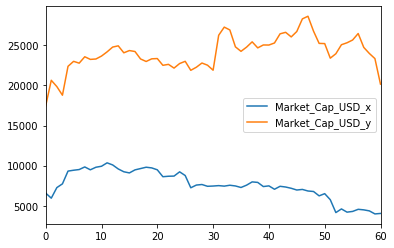

In [83]:
portfolio_two._get_numeric_data().plot()

### Writing files

In [84]:
excelbook = pd.ExcelWriter('output.xlsx')

In [85]:
excelbook

In [86]:
portfolio_two.to_excel(excelbook, 'sheet1')
portfolio_two.to_excel(excelbook, 'sheet2')
excelbook.save()

In [87]:
!rm output.xlsx

Pandas, overall, is one of the reason why Python is such a great software. 
There are many other interesting pandas features I could have shown, but it’s already enough to understand why a data scientist cannot do without pandas. To sum up, pandas is simple to use, hiding all the complex and abstract computations behind (generally) intuitive fast, if not the fastest data analysis package (it highly optimized in C).

In [88]:
tuples = []
for column in data.columns:
    tuples.append((column, data[str(column)].map(type).unique()))

In [89]:
year_distr =data.groupby('year').count()['Identifier'].reset_index().sort_values('year')

In [90]:
year_distr['relative'] = year_distr.Identifier / year_distr.Identifier.sum() *100

In [91]:
year_distr

,year,Identifier,relative
0,2014,623,1.634527
1,2015,629,1.650269
2,2016,1221,3.203463
3,2017,3116,8.175259
4,2018,32526,85.336482


**Uniqueness**

In [92]:
sector = data.GICS_Sector.unique()

In [93]:
data.columns

Index(['Identifier', 'Name', 'Period', 'Period_YYYYMMDD', 'Ticker',
       'Universe_Returns_F1W', 'Universe_Returns_F4W', 'Universe_Returns_F12W',
       'Weight', 'GICS_Sector', 'GICS_Ind_Grp', 'Market_Cap_USD', 'Price_USD',
       'NTM_EP', 'LTM_ROA', 'BP', 'LTM_EP', '5Y_Sales_Growth', 'counting',
       'month', 'day', 'year', 'market_label', 'LTM_AVG', 'extra'],
      dtype='object')

In [94]:
print(len(sector), sector)

11 ['Industrials' 'Utilities' 'Information Technology' 'Health Care'
 'Financials' 'Consumer Staples' 'Consumer Discretionary' 'Materials'
 'Energy' 'Communication Services' 'Real Estate']


**Delete columns**

In [95]:
data.columns

Index(['Identifier', 'Name', 'Period', 'Period_YYYYMMDD', 'Ticker',
       'Universe_Returns_F1W', 'Universe_Returns_F4W', 'Universe_Returns_F12W',
       'Weight', 'GICS_Sector', 'GICS_Ind_Grp', 'Market_Cap_USD', 'Price_USD',
       'NTM_EP', 'LTM_ROA', 'BP', 'LTM_EP', '5Y_Sales_Growth', 'counting',
       'month', 'day', 'year', 'market_label', 'LTM_AVG', 'extra'],
      dtype='object')

In [96]:
del data['extra']

#### Trying with categories

In [97]:
df_ind_grp = data\
    .groupby('GICS_Ind_Grp')\
    .count()['Identifier']\
    .reset_index()\
    .sort_values(by='Identifier')

<BarContainer object of 25 artists>

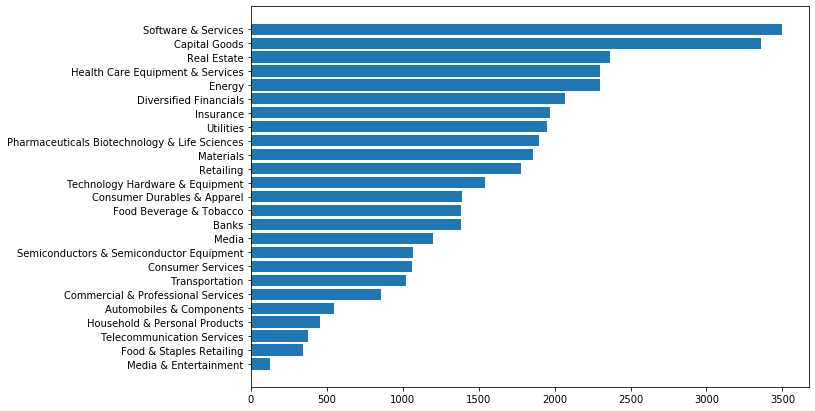

In [98]:
plt.figure(figsize=(10,7))

#x, y = df_ind_grp.GICS_Ind_Grp, df_ind_grp.Identifier
x = df_ind_grp.GICS_Ind_Grp
y = df_ind_grp.Identifier
plt.barh(x,y)

---
#### *Learn more about Pandas package at [Pandas.org](https://pandas.pydata.org ) and its book [Pandas official documentation](https://pandas.pydata.org/docs/pandas.pdf) if you are familirized with SQL syntax the following sources are of much help [pydata.org/comparison_with_sql](https://pandas.pydata.org/pandas-docs/stable/getting_started/comparison/comparison_with_sql.html) and [medium.com/jbennetcodes](https://medium.com/jbennetcodes/how-to-rewrite-your-sql-queries-in-pandas-and-more-149d341fc53e)* 